In [16]:
import numpy as np
import scipy as sp
import statsmodels.formula.api as smf
import statsmodels.api as sm
import pandas as pd
import seaborn as sns
from statsmodels.tools.eval_measures import rmse
sns.set(rc={'figure.figsize':(11.7,8.27)})
money_df = pd.read_csv("money_ball.csv")
soap_df = pd.read_csv("soap_data.csv")

# Problem 1

Researchers structure the hypothesis and measure the statistical association between AI robot adoption and spending (spending per visit). They collect the data from one of the biggest chains in India. Specifically, they collect spending per visit and the total time of AI robot exposure by customer. Researchers leverage the OLS model to measure the association between AI robot adoption and spending. 

1. Based on the table, can we say that AI robot adoption has a positive association with spending? If so, why? 
2. In measuring the impact of AI robot adoption, is there a potential for endogeneity issue? If so, describe two potential endogeneity issues. 

# Answers:

1. We can say that AI robot adoption has a positive association with spending. This is because the p-value of the coefficient of the independent variable is less than 0.01, which implies significance as the odds that the positive association is false is 1%. Moreover, it’s a positive association as the AI Exposure time of 5.563 is > 0 so it’s a positive relationship.
</br>
</br>
2. It is possible to encounter potential endogeneity issues such as omitted independent variables and measurement error. There might be observed or unobserved independent variables that can be included in the model.  The spending per visit of the customer might be influenced by factors such as time or occasion during the visit or promotions. The time of AI robot exposure by customer might also be correlated to the appearance of the AI robot or its user interface.  It is also possible that measurement error such as coding or reporting error to arise though it is highly unlikely if the time of AI robot exposure is generated automatically.


# Problem 2

One argues that there is no association between height and weight of soap; however, others argue that there is a relationship. Structure the hypothesis and make a statistical decision regarding these two arguments. When making a decision, consider the p-value for the statistical significance of the coefficient. Can we say that there is an association between height and the weight of soap? If so, why? 

In [17]:
print(f"H0: r = 0, no linear relationship between height and weight")
print(f"H1: r != 0, there is a linear relationship between height and weight")

weight = soap_df["soap_weight"]
height = soap_df["soap_height"]
regression = sp.stats.linregress(weight, height)
print(regression)
print('\n')
print(f"We can say that there is a { 'positive' if regression.rvalue > 0 else 'negative'} correlation between soap_weight and soap_height as the rvalue is more than 0")
print(f"However, the relation between the 2 datasets is not very strong as the rvalue of {regression.rvalue} is less than 0.5")
print(f"Given that the pvalue of {regression.pvalue} is less than 0.05, we reject the null hypothesis that the correlation between soap_weight and soap_height is not significant and accept the alternative hypothesis that the relation between weight and height is significant\n")

print("This shows that there is a positive association between height and weight")

H0: r = 0, no linear relationship between height and weight
H1: r != 0, there is a linear relationship between height and weight
LinregressResult(slope=0.8948675089720269, intercept=31.36192910869672, rvalue=0.20089209823905532, pvalue=0.02847153625689316, stderr=0.4034202185967116)


We can say that there is a positive correlation between soap_weight and soap_height as the rvalue is more than 0
However, the relation between the 2 datasets is not very strong as the rvalue of 0.20089209823905532 is less than 0.5
Given that the pvalue of 0.02847153625689316 is less than 0.05, we reject the null hypothesis that the correlation between soap_weight and soap_height is not significant and accept the alternative hypothesis that the relation between weight and height is significant

This shows that there is a positive association between height and weight


# Problem 3

Assume that you are Oakland Athletics general manager Billy Beane and want to use statistics to maximize the number of winnings. The coaching team argues that the batting average has an association with the number of winning. Structure the hypothesis and make a statistical decision regarding this argument. As a manager, are you plan to make a contract with a player with has a high batting average? If so, why? Or Why not? 

In [18]:
print(f"H0: r = 0.05, no linear relationship between batting and winning")
print(f"H1: r != 0.05, there is a linear relationship between batting and winning\n")
beta = money_df["bataverage"]
wins = money_df["wins"]
# NOTE: low R square or adjusted R square means poor association (below 0.4), a low positive r-value means poor association also (below 0.5)
# NOTE: a high RMSE of > 0.5 means that there is poor association as there are many deviations from the best fit line

regression = sp.stats.linregress(beta, wins)
print(f"coefficient correlation r-value: {regression.slope}")
print(f"p-value: {regression.pvalue}\n")

lm = smf.ols(formula="wins ~ bataverage", data=money_df).fit()
print(lm.summary())
predictions = lm.predict(beta)
print(f"RMSE = {rmse(wins, predictions)}")

H0: r = 0.05, no linear relationship between batting and winning
H1: r != 0.05, there is a linear relationship between batting and winning

coefficient correlation r-value: 94.23269128167318
p-value: 0.02528424569704611

                            OLS Regression Results                            
Dep. Variable:                   wins   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     5.141
Date:                Sun, 13 Feb 2022   Prob (F-statistic):             0.0253
Time:                        22:30:52   Log-Likelihood:                -339.69
No. Observations:                 114   AIC:                             683.4
Df Residuals:                     112   BIC:                             688.9
Df Model:                           1                                         
Covariance Type:            nonrobust                               

In [19]:
print("As a general manager, I want to maximize my wins and I am hoping to see if there is a correlation between the number of wins and the number of the number of bating average")
print("However, only 3.5% of the the wins can be explained by a batting average, meaning that there's not enough conclusive evidence to justify making a contract with high batting average players, as the association with batting average to wins is very weak.")

As a general manager, I want to maximize my wins and I am hoping to see if there is a correlation between the number of wins and the number of the number of bating average
However, only 3.5% of the the wins can be explained by a batting average, meaning that there's not enough conclusive evidence to justify making a contract with high batting average players, as the association with batting average to wins is very weak.


<AxesSubplot:xlabel='bataverage', ylabel='wins'>

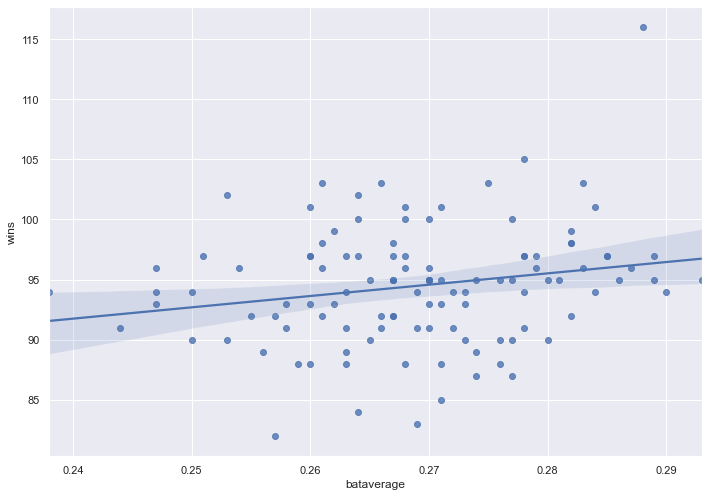

In [20]:
sns.regplot(x=beta, y=wins, data=money_df)